## Exploratory analysis on Purchase data

In [1]:
import numpy as np 
import pandas as pd

from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
import pickle

import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

In [2]:
purchase_data_file = pd.read_csv('purchase data.csv')
purchase_data_file.head()

,ID,Day,Incidence,Brand,Quantity,Last_Inc_Brand,Last_Inc_Quantity,Price_1,Price_2,Price_3,...,Promotion_3,Promotion_4,Promotion_5,Sex,Marital status,Age,Education,Income,Occupation,Settlement size
0,200000001,1,0,0,0,0,0,1.59,1.87,2.01,...,0,0,0,0,0,47,1,110866,1,0
1,200000001,11,0,0,0,0,0,1.51,1.89,1.99,...,0,0,0,0,0,47,1,110866,1,0
2,200000001,12,0,0,0,0,0,1.51,1.89,1.99,...,0,0,0,0,0,47,1,110866,1,0
3,200000001,16,0,0,0,0,0,1.52,1.89,1.98,...,0,0,0,0,0,47,1,110866,1,0
4,200000001,18,0,0,0,0,0,1.52,1.89,1.99,...,0,0,0,0,0,47,1,110866,1,0


In [3]:
purchase_data = purchase_data_file.copy()

In [4]:
purchase_data.isnull().sum()

ID                   0
Day                  0
Incidence            0
Brand                0
Quantity             0
Last_Inc_Brand       0
Last_Inc_Quantity    0
Price_1              0
Price_2              0
Price_3              0
Price_4              0
Price_5              0
Promotion_1          0
Promotion_2          0
Promotion_3          0
Promotion_4          0
Promotion_5          0
Sex                  0
Marital status       0
Age                  0
Education            0
Income               0
Occupation           0
Settlement size      0
dtype: int64

## Import Segmentation Model


In [5]:
scaler = pickle.load(open('scaler.pickle','rb'))
pca = pickle.load(open('pca.pickle','rb'))
kmeans_pca = pickle.load(open('kmeans_pca.pickle','rb'))

## Standardization

In [6]:
features = purchase_data[['Sex','Marital status','Age','Education','Income','Occupation','Settlement size']]

In [7]:
purchase_segm_std = scaler.transform(features)

## PCA

In [8]:
purchase_segm_pca = pca.transform(purchase_segm_std)

## K-means PCA

In [9]:
purchase_segm_kmeans_pca = kmeans_pca.predict(purchase_segm_pca)

In [10]:
purchase_predictors = purchase_data_file.copy()

In [11]:
purchase_predictors['Segment'] = purchase_segm_kmeans_pca

In [12]:
purchase_predictors['Segment'].unique()

array([0, 3, 2, 1])

In [13]:
purchase_predictors

,ID,Day,Incidence,Brand,Quantity,Last_Inc_Brand,Last_Inc_Quantity,Price_1,Price_2,Price_3,...,Promotion_4,Promotion_5,Sex,Marital status,Age,Education,Income,Occupation,Settlement size,Segment
0,200000001,1,0,0,0,0,0,1.59,1.87,2.01,...,0,0,0,0,47,1,110866,1,0,0
1,200000001,11,0,0,0,0,0,1.51,1.89,1.99,...,0,0,0,0,47,1,110866,1,0,0
2,200000001,12,0,0,0,0,0,1.51,1.89,1.99,...,0,0,0,0,47,1,110866,1,0,0
3,200000001,16,0,0,0,0,0,1.52,1.89,1.98,...,0,0,0,0,47,1,110866,1,0,0
4,200000001,18,0,0,0,0,0,1.52,1.89,1.99,...,0,0,0,0,47,1,110866,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
58688,200000500,703,0,0,0,2,1,1.41,1.85,2.01,...,0,0,0,0,42,1,120946,1,0,0
58689,200000500,710,0,0,0,0,0,1.36,1.84,2.09,...,0,0,0,0,42,1,120946,1,0,0
58690,200000500,717,0,0,0,0,0,1.50,1.80,2.14,...,0,0,0,0,42,1,120946,1,0,0
58691,200000500,722,1,2,3,0,0,1.51,1.82,2.09,...,0,0,0,0,42,1,120946,1,0,0


In [14]:
temp1 = purchase_predictors[['ID','Incidence']].groupby(['ID'],as_index = False).count()
temp1 = temp1.set_index('ID')
temp1

,Incidence
ID,
200000001,101
200000002,87
200000003,97
200000004,85
200000005,111
...,...
200000496,120
200000497,120
200000498,131


In [15]:
temp1 = temp1.rename(columns = {'Incidence':'N_Visits'})
temp1

,N_Visits
ID,
200000001,101
200000002,87
200000003,97
200000004,85
200000005,111
...,...
200000496,120
200000497,120
200000498,131


In [16]:
temp2 = purchase_predictors[['ID','Incidence']].groupby('ID').sum()
temp2 = temp2.rename(columns = {'Incidence':'N_Purchases'})
temp3 = temp1.join(temp2)
temp3

,N_Visits,N_Purchases
ID,,
200000001,101,9
200000002,87,11
200000003,97,10
200000004,85,11
200000005,111,13
...,...,...
200000496,120,20
200000497,120,43
200000498,131,39


In [17]:
temp3['prop_n_purchases'] = temp3['N_Purchases']/temp3['N_Visits']
temp3

,N_Visits,N_Purchases,prop_n_purchases
ID,,,
200000001,101,9,0.089109
200000002,87,11,0.126437
200000003,97,10,0.103093
200000004,85,11,0.129412
200000005,111,13,0.117117
...,...,...,...
200000496,120,20,0.166667
200000497,120,43,0.358333
200000498,131,39,0.297710


In [18]:
temp4 = purchase_predictors[['Segment','ID']].groupby('ID').mean()
purchase_descr = temp3.join(temp4)
# purchase_descr['labels'] = purchase_descr['Segment'].map({0:'fewer-opportunities',
#                          1:'Standard',
#                          2:'carrer-focused',
#                          3:'well-off'
    
# })
purchase_descr.to_csv('Purchase_data_analysis.csv')
purchase_descr

,N_Visits,N_Purchases,prop_n_purchases,Segment
ID,,,,
200000001,101,9,0.089109,0.0
200000002,87,11,0.126437,3.0
200000003,97,10,0.103093,0.0
200000004,85,11,0.129412,0.0
200000005,111,13,0.117117,2.0
...,...,...,...,...
200000496,120,20,0.166667,1.0
200000497,120,43,0.358333,0.0
200000498,131,39,0.297710,1.0


## Segment Proportions

In [19]:
segm_prop = purchase_descr[['N_Purchases','Segment']].groupby('Segment').count()/purchase_descr.shape[0]
segm_prop = segm_prop.rename(columns = {'N_Purchases':'Segment Proportions'})
segm_prop.to_csv('Purchase Proportion of Each Segment.csv')
segm_prop

,Segment Proportions
Segment,
0.0,0.378
1.0,0.206
2.0,0.220
3.0,0.196


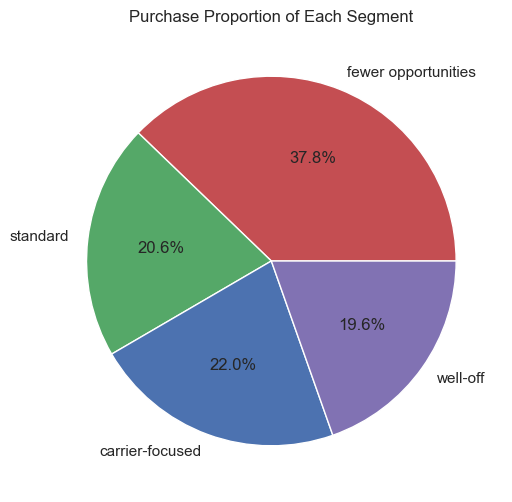

In [20]:
plt.figure(figsize = (9,6))
plt.pie(segm_prop['Segment Proportions'],
        colors = ['r','g','b','m'],
        labels = ['fewer opportunities','standard','carrier-focused','well-off'],
        autopct = '%1.1f%%'
       )
plt.title('Purchase Proportion of Each Segment')
plt.savefig("segment_proportions.png", facecolor='#E6E6FA', bbox_inches="tight",
            pad_inches=0.3, transparent=True)

## Purchase Occasion and Purchase Incidence

In [21]:
segments_mean = purchase_descr.groupby('Segment').mean()
segments_mean.to_csv('Purchase_data_segment_analysis.csv')
segments_mean

,N_Visits,N_Purchases,prop_n_purchases
Segment,,,
0.0,113.730159,22.756614,0.201588
1.0,117.699029,24.902913,0.212773
2.0,123.454545,39.827273,0.283102
3.0,117.295918,34.602041,0.284478


In [22]:
segments_std_deviation = purchase_descr.groupby('Segment').std()
segments_std_deviation.to_csv('Purchase_data_segment_analysis_with_std_deviation.csv')

segments_std_deviation

,N_Visits,N_Purchases,prop_n_purchases
Segment,,,
0.0,16.410498,13.815040,0.120335
1.0,19.039605,16.774464,0.126603
2.0,44.864656,53.744530,0.200056
3.0,20.716152,25.900579,0.171787


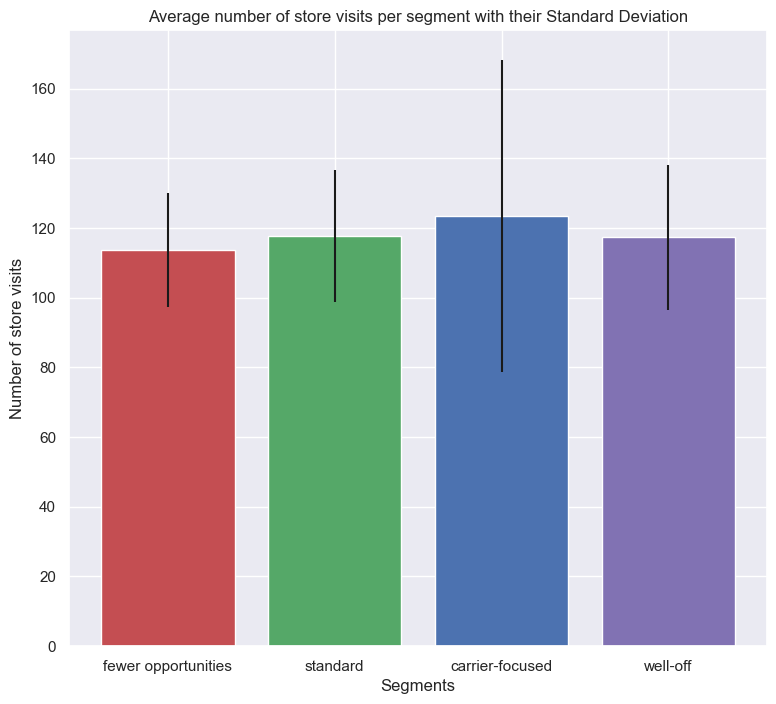

In [23]:
plt.figure(figsize = (9,8))
plt.bar (x = (0,1,2,3),
            tick_label = ['fewer opportunities','standard','carrier-focused','well-off'],
            height =segments_mean['N_Visits'] ,
            yerr = segments_std_deviation['N_Visits'],
            color = ['r','g','b','m']
)
plt.xlabel('Segments')
plt.ylabel('Number of store visits')
plt.title('Average number of store visits per segment with their Standard Deviation')
plt.savefig("avg_store_visits.png", facecolor='#E6E6FA', bbox_inches="tight",
            pad_inches=0.3, transparent=True)
plt.show()

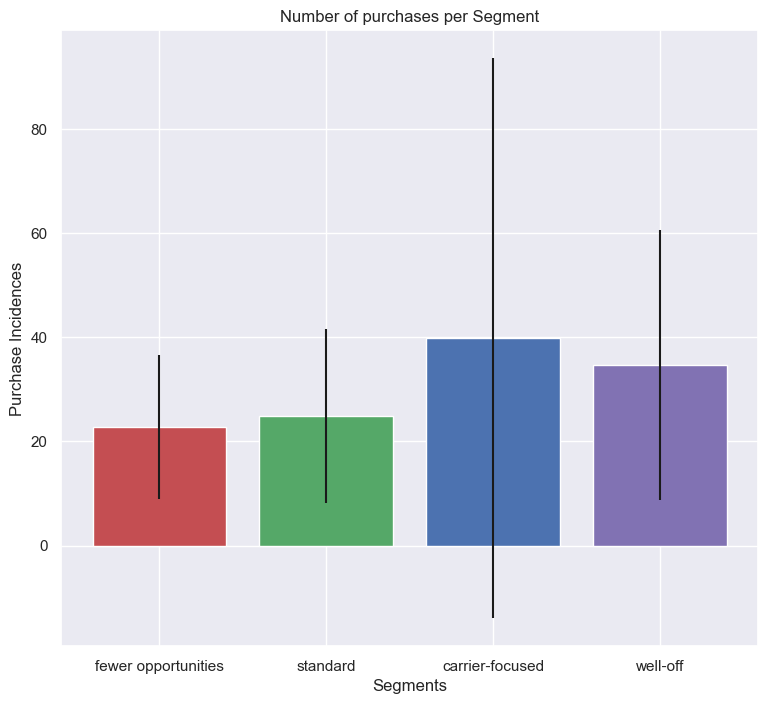

In [24]:
plt.figure(figsize = (9,8))
plt.bar (x = (0,1,2,3),
            tick_label = ['fewer opportunities','standard','carrier-focused','well-off'],
            height =segments_mean['N_Purchases'] ,
            yerr = segments_std_deviation['N_Purchases'],
            color = ['r','g','b','m']
)
plt.xlabel('Segments')
plt.ylabel('Purchase Incidences')
plt.title('Number of purchases per Segment')
plt.savefig("num_purchases.png", facecolor='#E6E6FA', bbox_inches="tight",
            pad_inches=0.3, transparent=True)
plt.show()

## Brand Choice

In [25]:
purchase_incidence = purchase_predictors[purchase_predictors['Incidence']==1]

In [26]:
purchase_incidence

,ID,Day,Incidence,Brand,Quantity,Last_Inc_Brand,Last_Inc_Quantity,Price_1,Price_2,Price_3,...,Promotion_4,Promotion_5,Sex,Marital status,Age,Education,Income,Occupation,Settlement size,Segment
6,200000001,28,1,2,2,0,0,1.50,1.90,1.99,...,0,0,0,0,47,1,110866,1,0,0
11,200000001,58,1,5,1,0,0,1.39,1.90,1.91,...,0,1,0,0,47,1,110866,1,0,0
19,200000001,110,1,1,2,0,0,1.47,1.90,1.99,...,1,0,0,0,47,1,110866,1,0,0
24,200000001,142,1,4,1,0,0,1.21,1.35,1.99,...,0,0,0,0,47,1,110866,1,0,0
29,200000001,183,1,2,3,0,0,1.46,1.88,1.97,...,1,1,0,0,47,1,110866,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
58621,200000500,296,1,2,6,0,0,1.48,1.89,2.01,...,0,0,0,0,42,1,120946,1,0,0
58648,200000500,460,1,1,12,0,0,1.35,1.57,2.02,...,0,0,0,0,42,1,120946,1,0,0
58674,200000500,641,1,2,7,0,0,1.50,1.85,2.06,...,0,0,0,0,42,1,120946,1,0,0
58687,200000500,697,1,2,6,0,0,1.42,1.51,1.97,...,0,0,0,0,42,1,120946,1,0,0


In [27]:
brand_dummies = pd.get_dummies(purchase_incidence['Brand'],prefix = 'Brand',prefix_sep='_',dtype = 'int')
brand_dummies['Segments'],brand_dummies['ID'] = purchase_incidence['Segment'],purchase_incidence['ID']
brand_dummies

,Brand_1,Brand_2,Brand_3,Brand_4,Brand_5,Segments,ID
6,0,1,0,0,0,0,200000001
11,0,0,0,0,1,0,200000001
19,1,0,0,0,0,0,200000001
24,0,0,0,1,0,0,200000001
29,0,1,0,0,0,0,200000001
...,...,...,...,...,...,...,...
58621,0,1,0,0,0,0,200000500
58648,1,0,0,0,0,0,200000500
58674,0,1,0,0,0,0,200000500
58687,0,1,0,0,0,0,200000500


In [28]:
brand_dummies['Segments'].unique()

array([0, 3, 2, 1])

In [29]:
temp = brand_dummies.groupby('ID').mean()
mean_brandChoice_perSegment = temp.groupby('Segments').mean()
mean_brandChoice_perSegment.to_csv('mean_brandChoice_perSegment.csv')
mean_brandChoice_perSegment

,Brand_1,Brand_2,Brand_3,Brand_4,Brand_5
Segments,,,,,
0.0,0.137567,0.681190,0.020923,0.061548,0.098772
1.0,0.251186,0.396502,0.156481,0.059474,0.136357
2.0,0.072871,0.146808,0.039976,0.112395,0.627951
3.0,0.041928,0.117422,0.030610,0.613623,0.196417


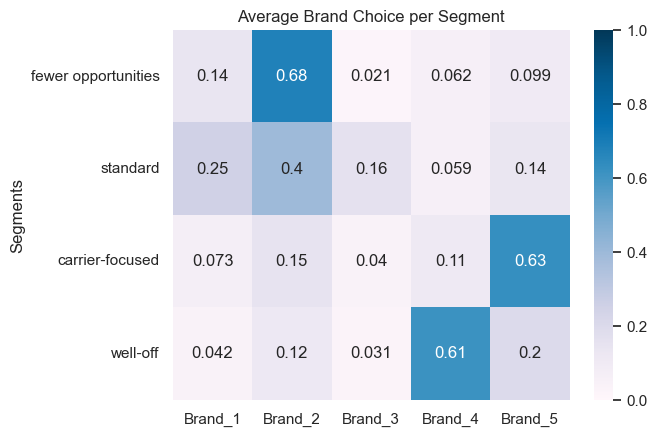

In [30]:
sns.heatmap(
    mean_brandChoice_perSegment,
    vmin = 0,
    vmax = 1,
    cmap = 'PuBu',
    annot = True,
    yticklabels = ['fewer opportunities','standard','carrier-focused','well-off']
)
plt.title('Average Brand Choice per Segment')
plt.savefig("avg_brand_choice.png", facecolor='#E6E6FA', bbox_inches="tight",
            pad_inches=0.3, transparent=True)
plt.show()

## Revenue

In [31]:
# Initialize an empty DataFrame to store the results
segments_brand_revenue = pd.DataFrame()

# For Brand 1
temp = purchase_predictors[purchase_predictors['Brand'] == 1].copy()
temp['Revenue Brand 1'] = temp['Price_1'] * temp['Quantity']
revenue_brand_1 = temp[['Segment', 'Revenue Brand 1']].groupby(['Segment']).sum().reset_index()
segments_brand_revenue = pd.merge(segments_brand_revenue, revenue_brand_1, on='Segment', how='outer') if not segments_brand_revenue.empty else revenue_brand_1

# For Brand 2
temp = purchase_predictors[purchase_predictors['Brand'] == 2].copy()
temp['Revenue Brand 2'] = temp['Price_2'] * temp['Quantity']
revenue_brand_2 = temp[['Segment', 'Revenue Brand 2']].groupby(['Segment']).sum().reset_index()
segments_brand_revenue = pd.merge(segments_brand_revenue, revenue_brand_2, on='Segment', how='outer')

# For Brand 3
temp = purchase_predictors[purchase_predictors['Brand'] == 3].copy()
temp['Revenue Brand 3'] = temp['Price_3'] * temp['Quantity']
revenue_brand_3 = temp[['Segment', 'Revenue Brand 3']].groupby(['Segment']).sum().reset_index()
segments_brand_revenue = pd.merge(segments_brand_revenue, revenue_brand_3, on='Segment', how='outer')

# For Brand 4
temp = purchase_predictors[purchase_predictors['Brand'] == 4].copy()
temp['Revenue Brand 4'] = temp['Price_4'] * temp['Quantity']
revenue_brand_4 = temp[['Segment', 'Revenue Brand 4']].groupby(['Segment']).sum().reset_index()
segments_brand_revenue = pd.merge(segments_brand_revenue, revenue_brand_4, on='Segment', how='outer')

# For Brand 5
temp = purchase_predictors[purchase_predictors['Brand'] == 5].copy()
temp['Revenue Brand 5'] = temp['Price_5'] * temp['Quantity']
revenue_brand_5 = temp[['Segment', 'Revenue Brand 5']].groupby(['Segment']).sum().reset_index()
segments_brand_revenue = pd.merge(segments_brand_revenue, revenue_brand_5, on='Segment', how='outer')

segments_brand_revenue


,Segment,Revenue Brand 1,Revenue Brand 2,Revenue Brand 3,Revenue Brand 4,Revenue Brand 5
0,0,2258.90,13955.14,716.25,1629.31,2230.50
1,1,2611.19,4768.52,3909.17,861.38,2439.75
2,2,736.09,1746.42,664.75,2363.84,19441.06
3,3,699.47,1298.23,731.35,14185.57,5509.69


In [32]:
segments_brand_revenue['Total Revenue'] = (segments_brand_revenue['Revenue Brand 1']+
                                           segments_brand_revenue['Revenue Brand 2']+
                                           segments_brand_revenue['Revenue Brand 3']+
                                           segments_brand_revenue['Revenue Brand 4']+
                                           segments_brand_revenue['Revenue Brand 5'])

segments_brand_revenue['Segment_prop'] = segm_prop['Segment Proportions']
segments_brand_revenue


,Segment,Revenue Brand 1,Revenue Brand 2,Revenue Brand 3,Revenue Brand 4,Revenue Brand 5,Total Revenue,Segment_prop
0,0,2258.90,13955.14,716.25,1629.31,2230.50,20790.10,0.378
1,1,2611.19,4768.52,3909.17,861.38,2439.75,14590.01,0.206
2,2,736.09,1746.42,664.75,2363.84,19441.06,24952.16,0.220
3,3,699.47,1298.23,731.35,14185.57,5509.69,22424.31,0.196


In [33]:
segments_brand_revenue['Segment']=segments_brand_revenue['Segment'].map({0:'fewer-opportunities',
                                                                        1:'Standard',
                                                                         2:'carrer-focused',
                                                                         3:'well-off'
                         })
segments_brand_revenue = segments_brand_revenue.set_index(['Segment'])   
segments_brand_revenue.to_csv('Brand_revenue_perSegment.csv')

segments_brand_revenue

,Revenue Brand 1,Revenue Brand 2,Revenue Brand 3,Revenue Brand 4,Revenue Brand 5,Total Revenue,Segment_prop
Segment,,,,,,,
fewer-opportunities,2258.90,13955.14,716.25,1629.31,2230.50,20790.10,0.378
Standard,2611.19,4768.52,3909.17,861.38,2439.75,14590.01,0.206
carrer-focused,736.09,1746.42,664.75,2363.84,19441.06,24952.16,0.220
well-off,699.47,1298.23,731.35,14185.57,5509.69,22424.31,0.196


<Figure size 1000x600 with 0 Axes>

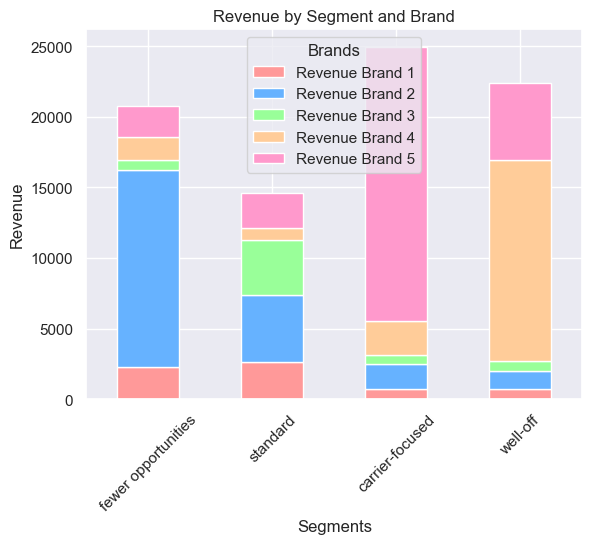

In [34]:
plt.figure(figsize=(10,6))
segments_brand_revenue[['Revenue Brand 1', 'Revenue Brand 2', 'Revenue Brand 3', 
                        'Revenue Brand 4', 'Revenue Brand 5']].plot(kind='bar', stacked=True, 
                        color=['#FF9999', '#66B2FF', '#99FF99', '#FFCC99', '#FF99CC'])
plt.title('Revenue by Segment and Brand')
plt.xlabel('Segments')
plt.ylabel('Revenue')
plt.xticks(ticks=range(4), labels=['fewer opportunities', 'standard', 'carrier-focused', 'well-off'], rotation=45)
plt.legend(title='Brands')
plt.savefig("revenue_by_segment_brand.png", bbox_inches="tight", pad_inches=0.3, transparent=True)
plt.show()